# Crime Analyzer in Chicago
### An exploratory data analysis (EDA) and visualization for crime in Chicago from 2001 to 2016

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering as AC



In [3]:
df = pd.read_csv("F:\VS Code\Crime Analyzer\Crimes_-_2001_to_Present.csv")

df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077146,13047495,JG229914,04/18/2023 08:00:00 AM,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
8077147,13168300,JG373901,08/07/2023 06:00:00 PM,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
8077148,13114024,JG309527,06/20/2023 07:00:00 PM,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
8077149,13188860,JG398340,08/26/2023 12:00:00 AM,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [4]:
df.isnull().sum()

# Finding missing records, the locations or coordinates do not matter as the Crime rrecord has been filed

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13087
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Community Area          613470
FBI Code                     0
X Coordinate             88958
Y Coordinate             88958
Year                         0
Updated On                   0
Latitude                 88958
Longitude                88958
Location                 88958
dtype: int64

We will not be using any of those columns in our analysis, so we filter them out 

In [5]:
df.drop(['Case Number', 'IUCR','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location'], inplace=True, axis=1)

As we can tell from the first few rows, we have several columns that will help us answer our questions. We will use the 'Date' column to explore temporal patterns, 'Primary Type' and 'Location Description' to investigate their relationship with time (month of the year, time of the day, hour of the day, .. etc). Later we will use geolocation to map out safe spots (and times) in the city.

In [6]:

df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
0,5741943,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False,24.0,NaN,NaN,NaN,NaN
1,25953,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,25.0,1141387.0,1913179.0,41.917838,-87.755969
2,26038,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,17.0,1152781.0,1941458.0,41.995219,-87.713355
3,13279676,11/09/2023 07:30:00 AM,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,19.0,1162518.0,1925906.0,41.952345,-87.677975
4,13274752,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,6.0,1183071.0,1847869.0,41.737751,-87.604856


In [7]:

df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')

df.index = pd.DatetimeIndex(df.Date)

In [8]:
# of records X # of features
df.shape

(8077151, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8077151 entries, 2007-08-25 09:22:18 to 2023-07-01 19:29:00
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Block                 object        
 3   Primary Type          object        
 4   Description           object        
 5   Location Description  object        
 6   Arrest                bool          
 7   Domestic              bool          
 8   District              float64       
 9   X Coordinate          float64       
 10  Y Coordinate          float64       
 11  Latitude              float64       
 12  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 754.9+ MB


As 'Location Description', 'Description' and 'Primary Type' columns are actually categorical columns , we will only keep the most frequent categories and then cast them to a categorical type.

In [10]:
loc_to_change  = list(df['Location Description'].value_counts()[20:].index)
desc_to_change = list(df['Description'].value_counts()[20:].index)

df.loc[df['Location Description'].isin(loc_to_change) , df.columns=='Location Description'] = 'OTHER'
df.loc[df['Description'].isin(desc_to_change) , df.columns=='Description'] = 'OTHER'

In [11]:
# we convert those 3 columns into 'Categorical' types 
df['Primary Type']         = pd.Categorical(df['Primary Type'])
df['Location Description'] = pd.Categorical(df['Location Description'])
df['Description']          = pd.Categorical(df['Description'])

## Exploration and Visualization

C:\Users\kadam\AppData\Local\Temp\ipykernel_15504\1198850693.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').size().plot(legend=False)


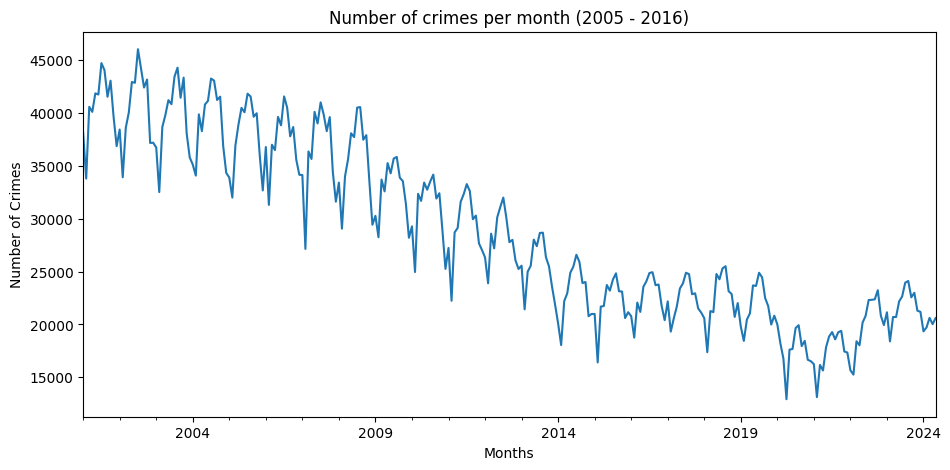

In [12]:
plt.figure(figsize=(11,5))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2005 - 2016)')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.show()

This chart shows a clear "periodic" pattern in the crimes over many years.

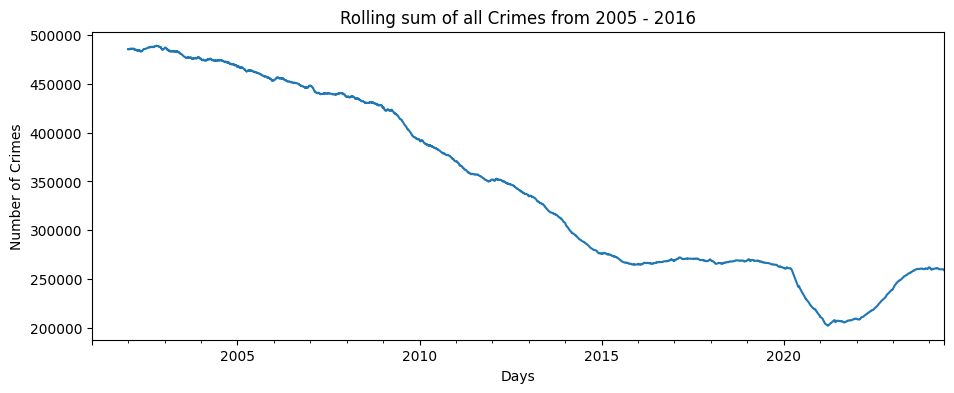

In [13]:
plt.figure(figsize=(11,4))
df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all Crimes from 2005 - 2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Days')
plt.show()

We see the line decreasing from 2006 up to some point around 2016 after which it stays around the same number of crimes. This all means that 2016 is really no better than 2015, but both years show a much better crime record (in total) than the previous years. Due to COVID, there is drastic reduction in Crimes in 2020 and it started to rise in 2021 and it has come to the same level as before the 2020 in 2024.


C:\Users\kadam\AppData\Local\Temp\ipykernel_15504\492969546.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_count_date = df.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=df.index.date, fill_value=0)


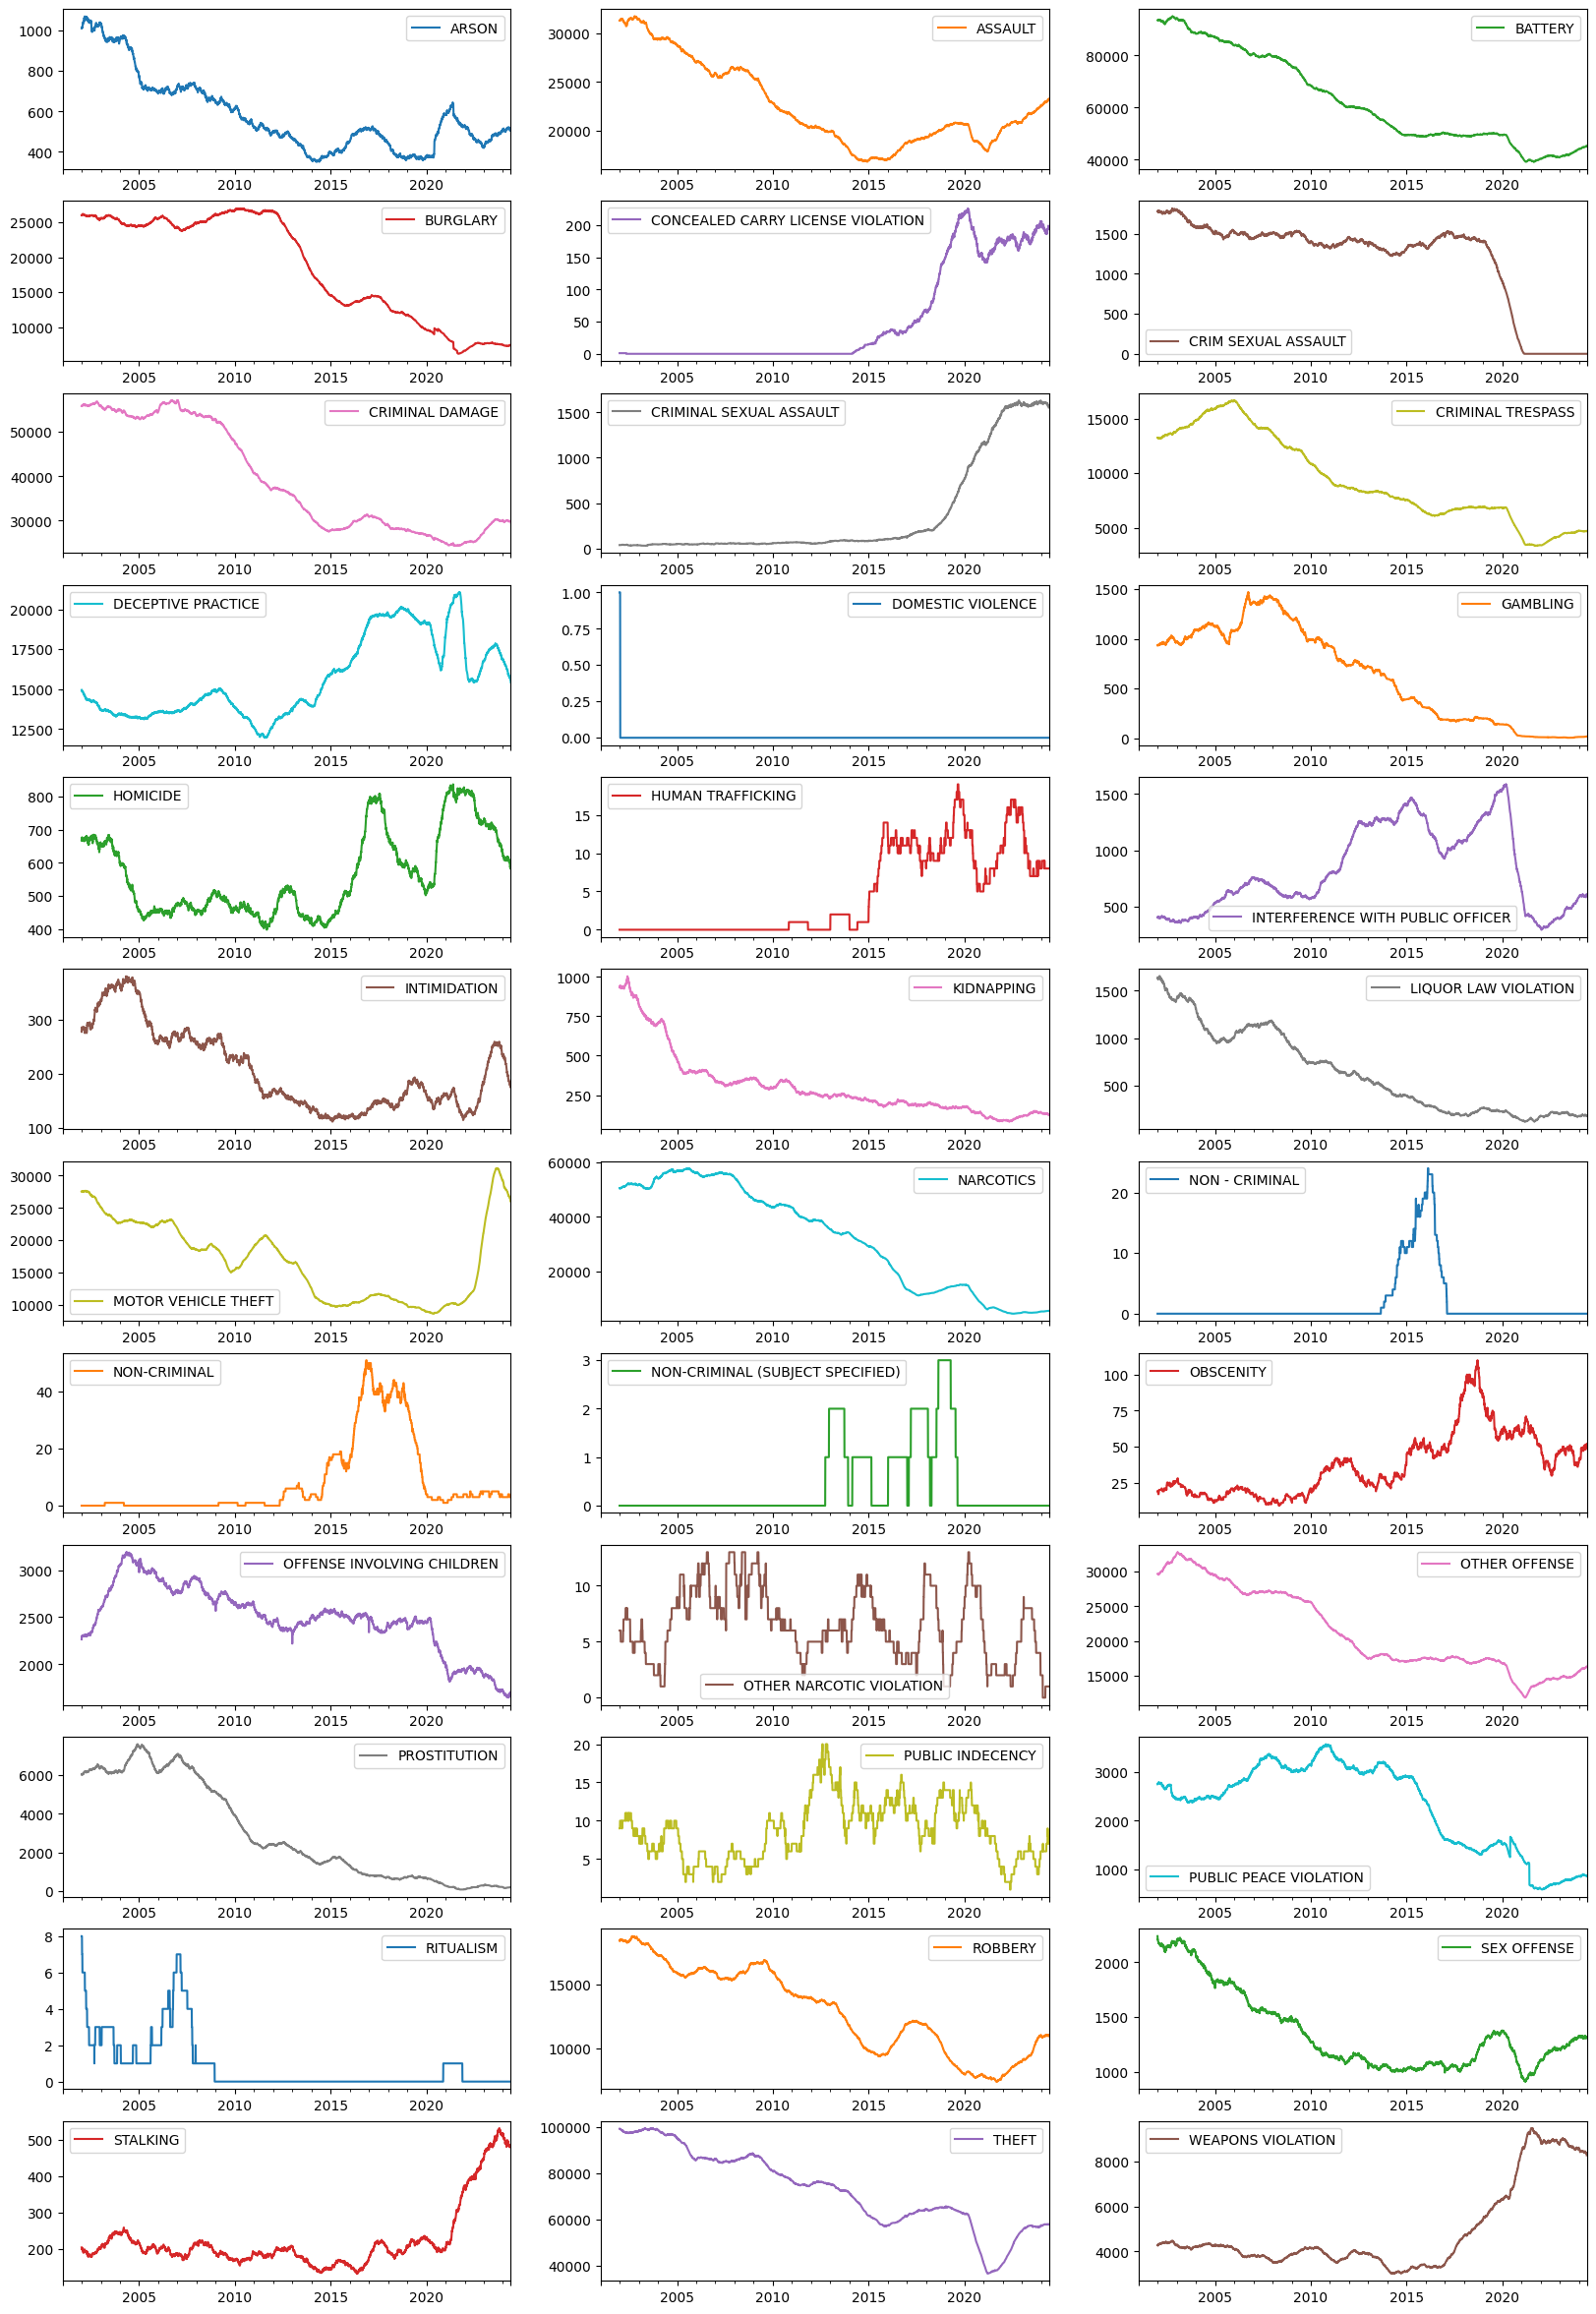

In [14]:
df_count_date = df.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=df.index.date, fill_value=0)
df_count_date.index = pd.DatetimeIndex(df_count_date.index)
plo = df_count_date.rolling(365).sum().plot(figsize=(20, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

## A general view of crime records by time, type and location

The first thing we are going to look at is if there is a difference in the number of crimes during specific days of the week. Are there more crimes during weekdays or weekend? 

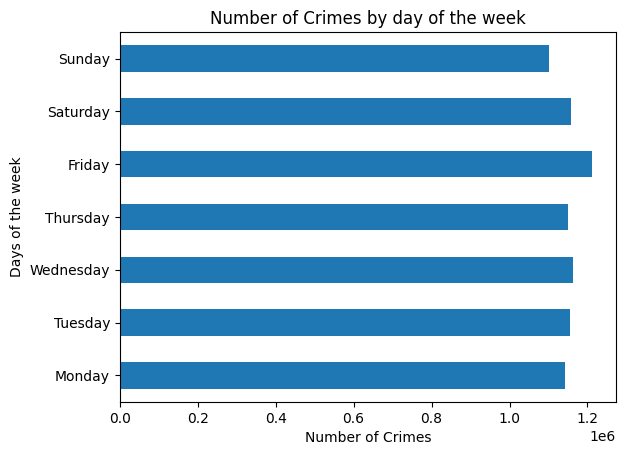

In [15]:
days = ['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby([df.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of Crimes')
plt.title('Number of Crimes by day of the week')
plt.show()

Friday has higher number of crime than other days,


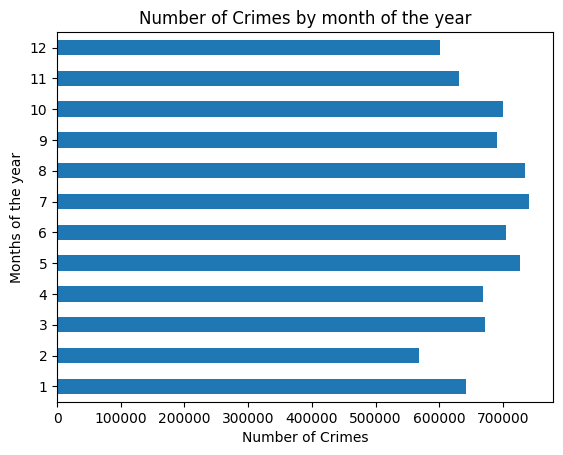

In [16]:
df.groupby([df.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of Crimes')
plt.title('Number of Crimes by month of the year')
plt.show()

Crimes rates seem to peak at summer months! 

C:\Users\kadam\AppData\Local\Temp\ipykernel_15504\72682197.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')


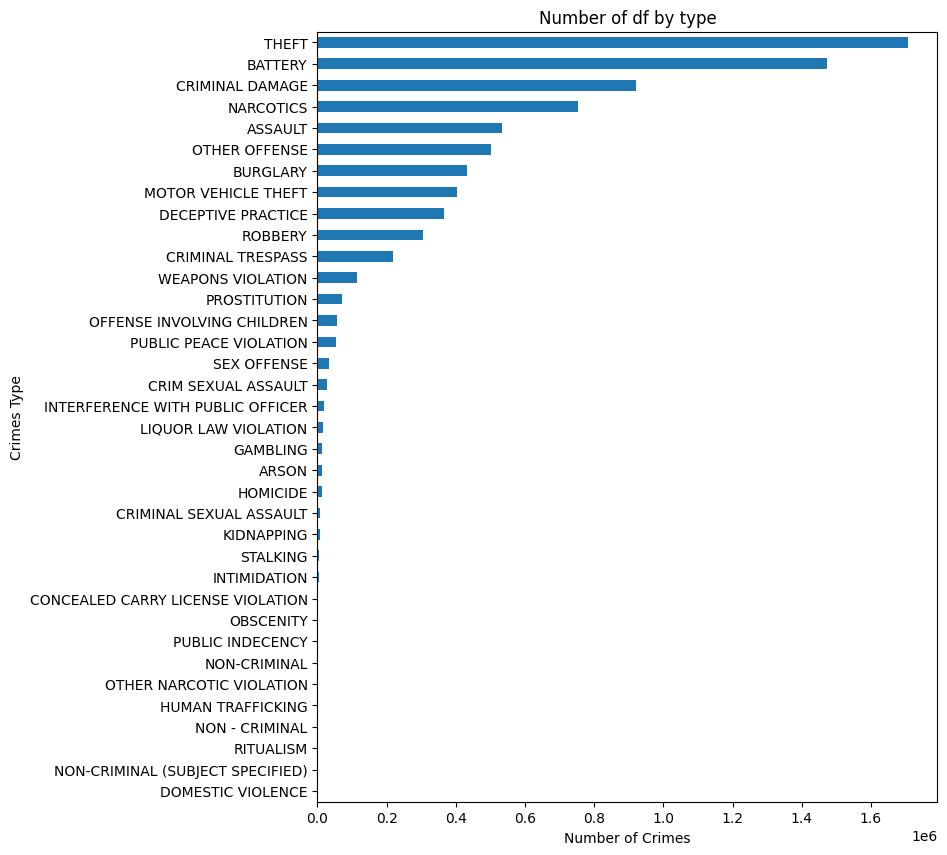

In [17]:
plt.figure(figsize=(8,10))
df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crimes Type')
plt.xlabel('Number of Crimes')
plt.show()

And similarly for crime location

C:\Users\kadam\AppData\Local\Temp\ipykernel_15504\1256931196.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([df['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')


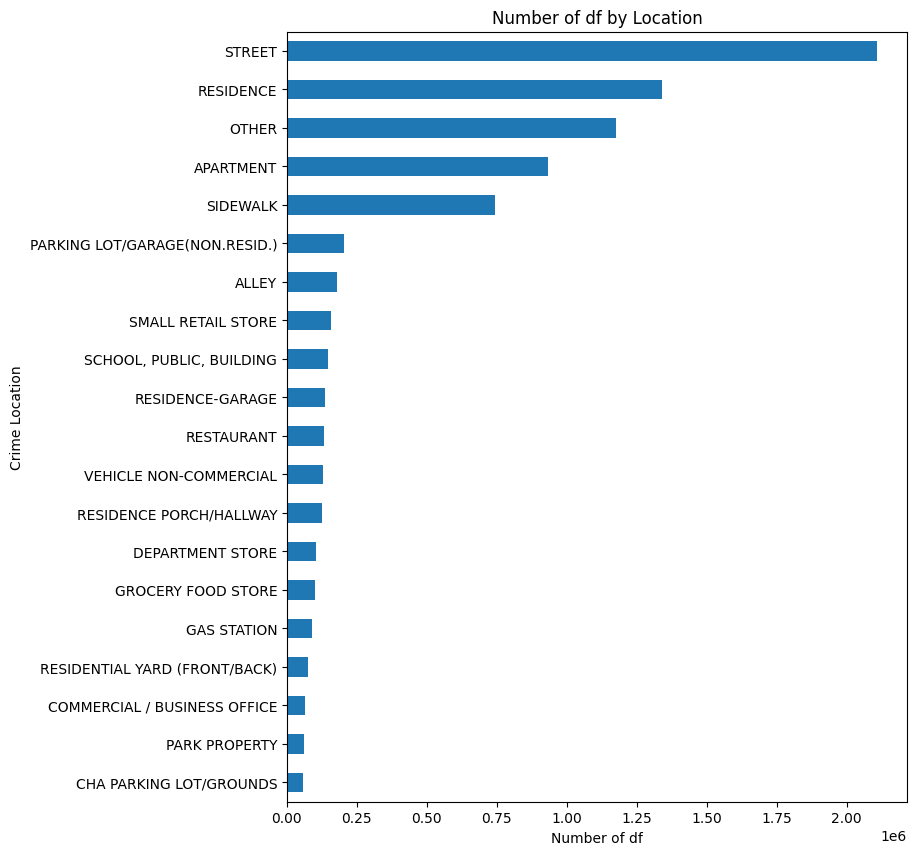

In [18]:
plt.figure(figsize=(8,10))
df.groupby([df['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

## Temporal analysis of crime rates by type and location

In [19]:

# Create a mapping of numerical days to day names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Pivot tables
hour_by_location = df.pivot_table(values='ID', index='Location Description', columns=df.index.hour, aggfunc=np.size).fillna(0)
hour_by_type = df.pivot_table(values='ID', index='Primary Type', columns=df.index.hour, aggfunc=np.size).fillna(0)
hour_by_week = df.pivot_table(values='ID', index=df.index.hour, columns=df.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_location = df.pivot_table(values='ID', index='Location Description', columns=df.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = df.pivot_table(values='ID', index='Primary Type', columns=df.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type = df.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)


hour_by_week.columns = hour_by_week.columns.map(day_mapping)

# Reorder columns according to the order of days
hour_by_week = hour_by_week[days].T

# Rename columns to day names for these pivot tables too
dayofweek_by_location.columns = dayofweek_by_location.columns.map(day_mapping)
dayofweek_by_type.columns = dayofweek_by_type.columns.map(day_mapping)

C:\Users\kadam\AppData\Local\Temp\ipykernel_15504\1574813926.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  hour_by_location = df.pivot_table(values='ID', index='Location Description', columns=df.index.hour, aggfunc=np.size).fillna(0)
C:\Users\kadam\AppData\Local\Temp\ipykernel_15504\1574813926.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  hour_by_type = df.pivot_table(values='ID', index='Primary Type', columns=df.index.hour, aggfunc=np.size).fillna(0)
C:\Users\kadam\AppData\Local\Temp\ipykernel_15504\1574813926.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify 

In [20]:
# Using Clustering Algorithm to sort the rows into meaningful groups and use group labels to re-sort our matrix to generate heatmap visualization

def scale_df(df, axis=0):
    df_copy = df.copy()
    return (df_copy - df_copy.mean(axis=axis)) / df_copy.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr', xlabel='Hour', ylabel='Type'):
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix, :], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]), df.columns, rotation=45, ha='right')  # Rotate x-axis labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(False)
    plt.show()

def scale_and_plot(df, ix=None, xlabel='Hour', ylabel='Type'):
    df_copy = df.copy()
    df_marginal_scaled = scale_df(df_copy.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort()
    cap = np.min([np.max(df_marginal_scaled.to_numpy()), np.abs(np.min(df_marginal_scaled.to_numpy()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1 * cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix, xlabel=xlabel, ylabel=ylabel)

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

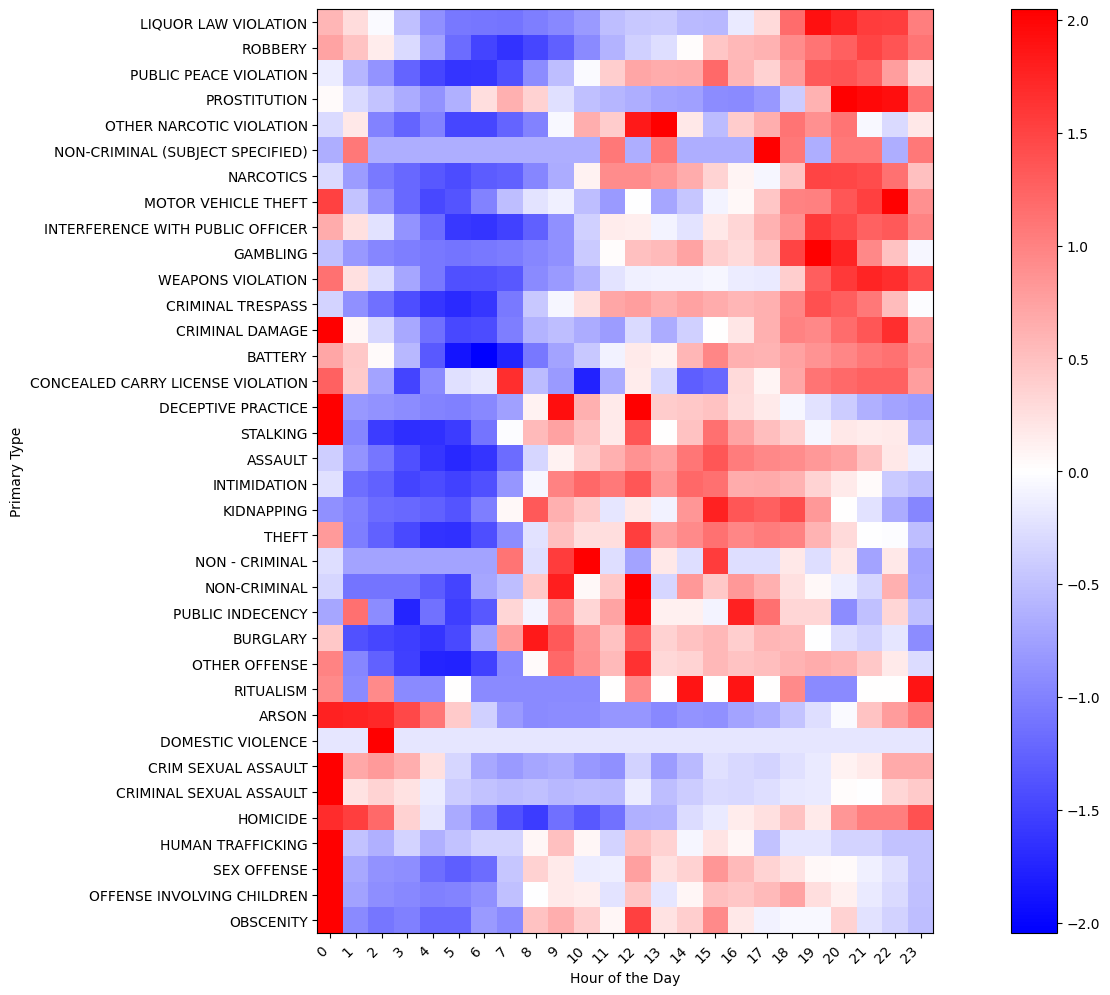

In [21]:
plt.figure(figsize=(20, 12))
scale_and_plot(hour_by_type, xlabel='Hour of the Day', ylabel='Primary Type')


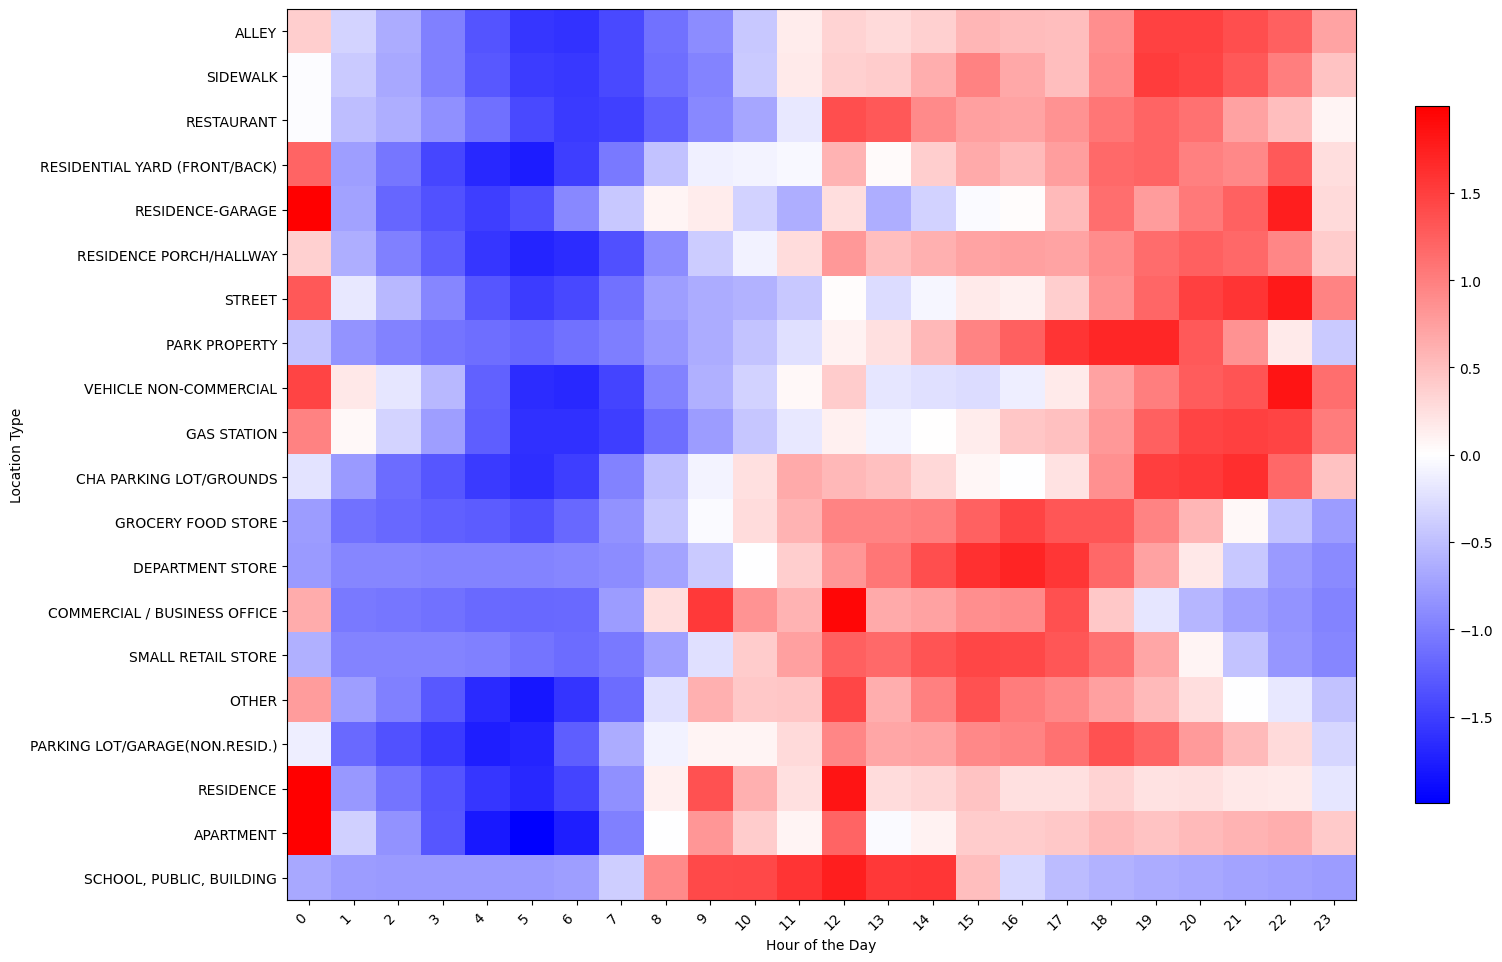

In [22]:
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_location , xlabel='Hour of the Day', ylabel='Location Type')

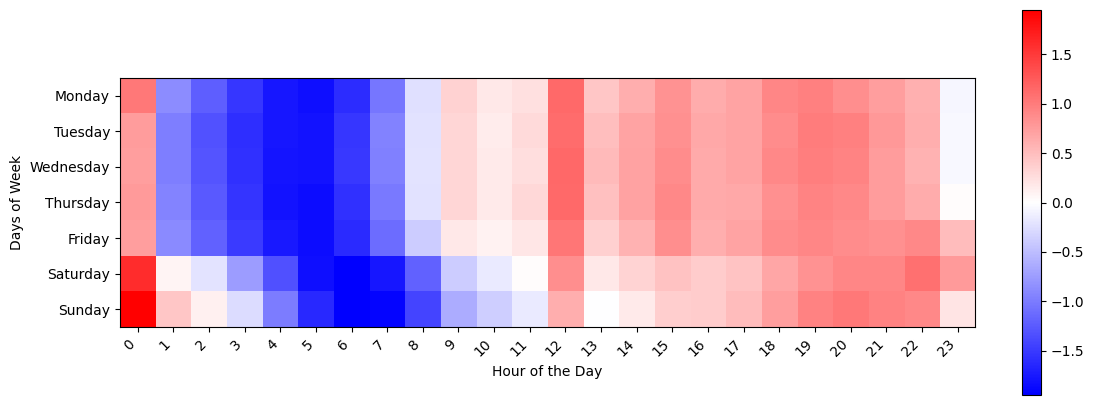

In [23]:
plt.figure(figsize=(12,5))
scale_and_plot(hour_by_week, ix=np.arange(7),  xlabel='Hour of the Day', ylabel='Days of Week')

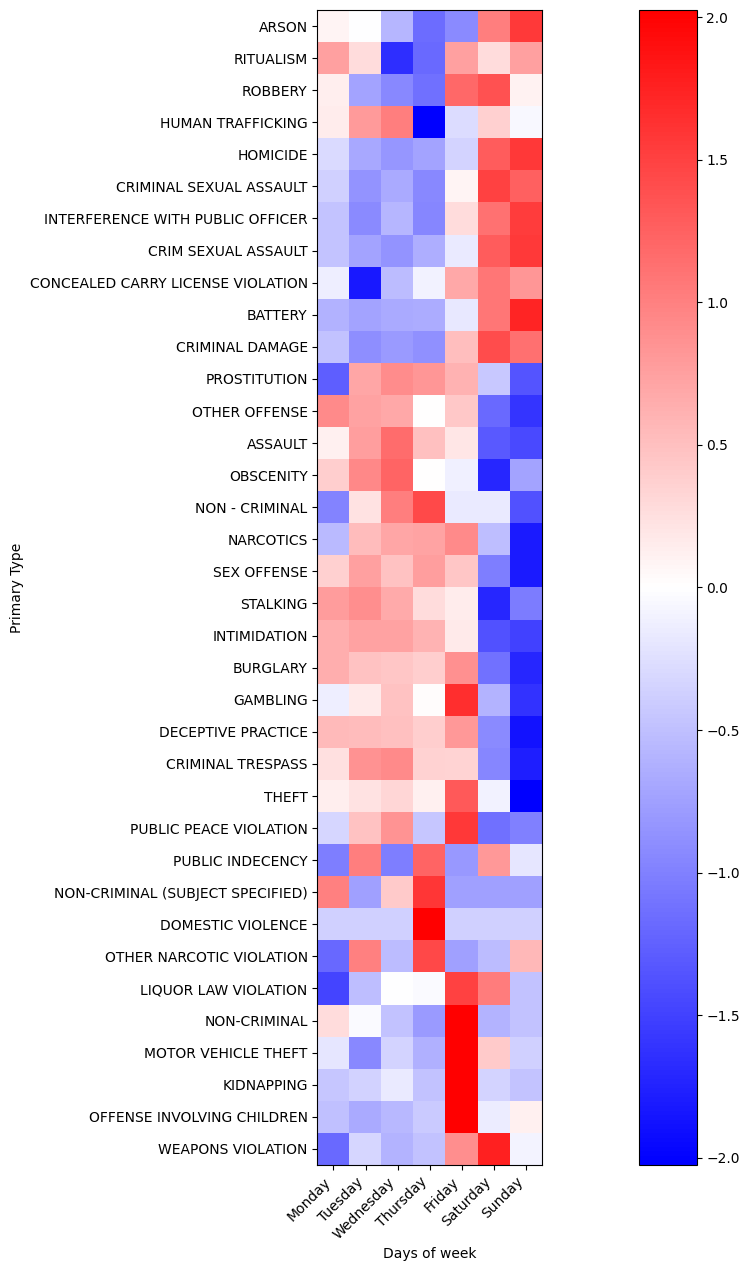

In [24]:
plt.figure(figsize=(25,15))
scale_and_plot(dayofweek_by_type, xlabel='Days of week', ylabel='Primary Type')

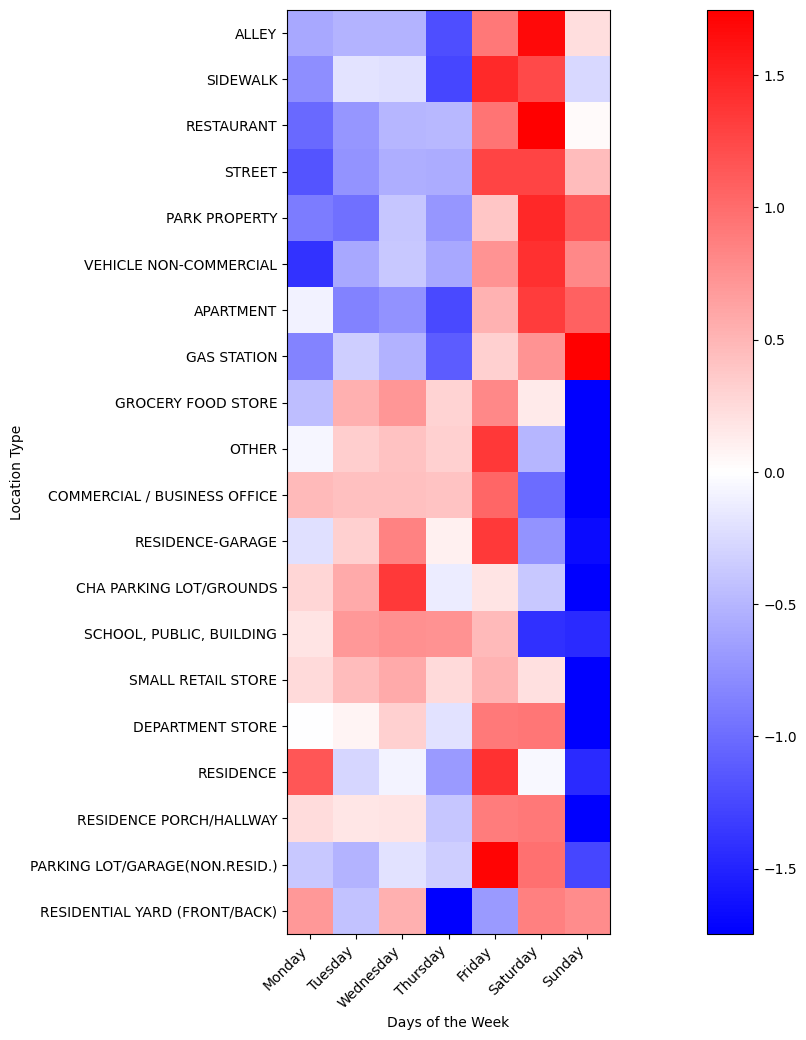

In [25]:
plt.figure(figsize=(25,12))
scale_and_plot(dayofweek_by_location,  xlabel='Days of the Week', ylabel='Location Type')


## Where a certain crime type is most likely to happen?

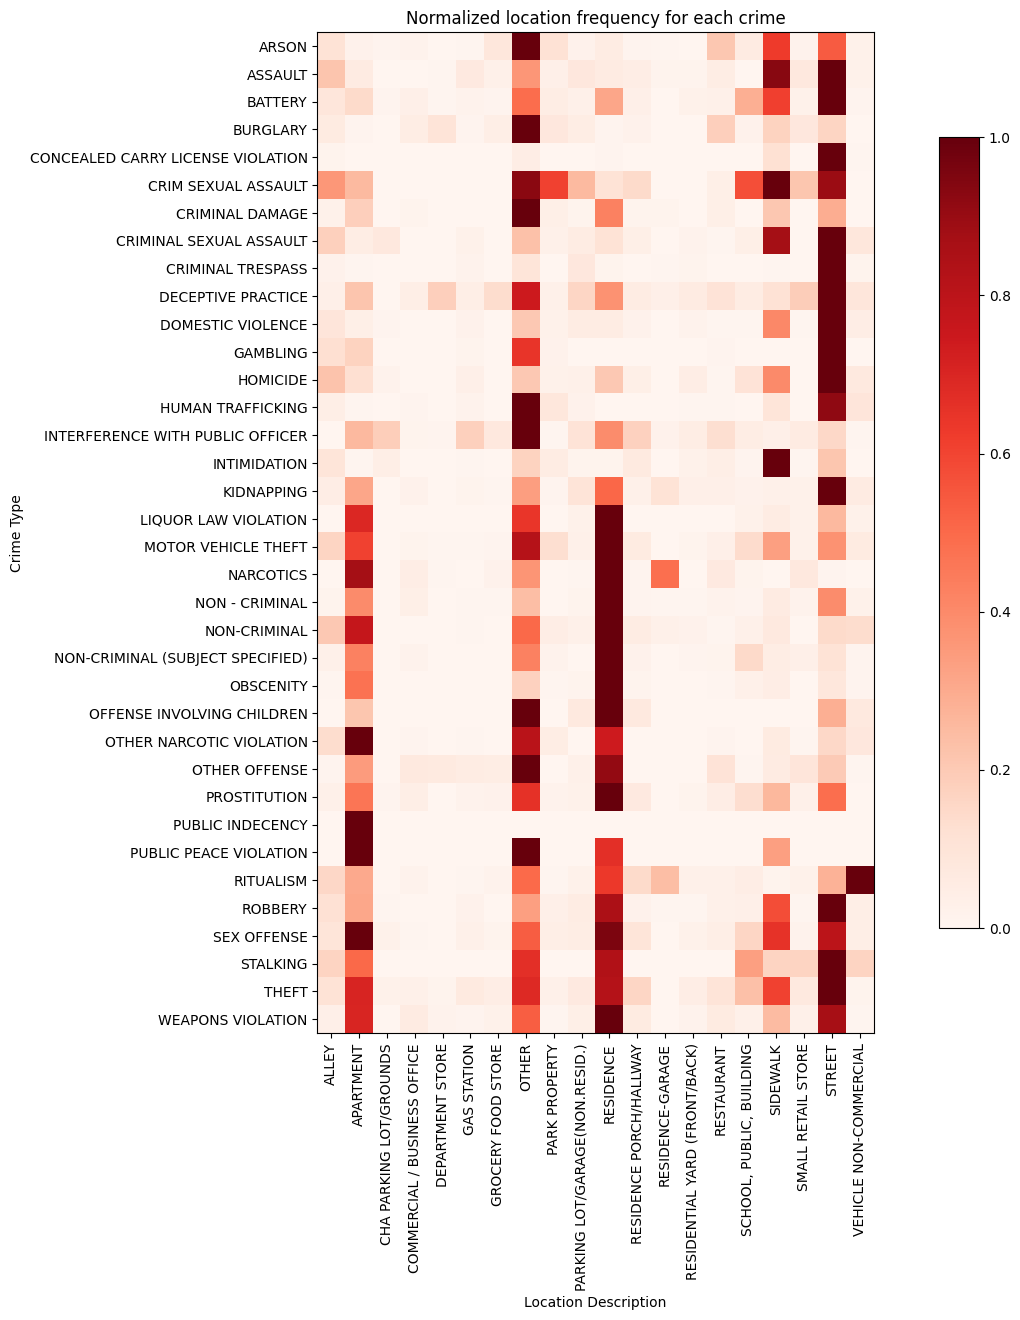

In [26]:
df_norm = normalize(location_by_type)

# Perform Agglomerative Clustering and get the sorted indices
ix = AC(3).fit(df_norm.T).labels_.argsort()

# Plotting the heatmap
plt.figure(figsize=(17, 13))
plt.imshow(df_norm.T.iloc[ix, :], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df_norm.shape[0]), df_norm.index, rotation='vertical')
plt.yticks(np.arange(df_norm.shape[1]), df_norm.columns)
plt.title('Normalized location frequency for each crime')
plt.xlabel('Location Description')
plt.ylabel('Crime Type')
plt.grid(False)
plt.show()

In [27]:
df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
Date,,,,,,,,,,,,,
2007-08-25 09:22:18,5741943,2007-08-25 09:22:18,074XX N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False,24.0,NaN,NaN,NaN,NaN
2021-05-24 15:06:00,25953,2021-05-24 15:06:00,020XX N LARAMIE AVE,HOMICIDE,OTHER,STREET,True,False,25.0,1141387.0,1913179.0,41.917838,-87.755969
2021-06-26 09:24:00,26038,2021-06-26 09:24:00,062XX N MC CORMICK RD,HOMICIDE,OTHER,OTHER,True,False,17.0,1152781.0,1941458.0,41.995219,-87.713355
2023-11-09 07:30:00,13279676,2023-11-09 07:30:00,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,19.0,1162518.0,1925906.0,41.952345,-87.677975
2023-11-12 07:59:00,13274752,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,BATTERY,OTHER,SMALL RETAIL STORE,True,False,6.0,1183071.0,1847869.0,41.737751,-87.604856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-18 08:00:00,13047495,2023-04-18 08:00:00,003XX N JEFFERSON ST,DECEPTIVE PRACTICE,OTHER,APARTMENT,False,False,12.0,1172269.0,1902384.0,41.887589,-87.642827
2023-08-07 18:00:00,13168300,2023-08-07 18:00:00,0000X W 95TH ST,ROBBERY,OTHER,SIDEWALK,False,False,6.0,1177527.0,1841973.0,41.721698,-87.625345
2023-06-20 19:00:00,13114024,2023-06-20 19:00:00,031XX S AVERS AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,10.0,1151205.0,1883542.0,41.836324,-87.720674


In [28]:
df_cleaned = df.copy()
# Set invalid Longitude values to 0.0
df_cleaned.loc[df_cleaned['Longitude'] < -88.0, 'Longitude'] = 0.0
df_cleaned.loc[df_cleaned['Longitude'] > -87.5, 'Longitude'] = 0.0

# Set invalid Latitude values to 0.0
df_cleaned.loc[df_cleaned['Latitude'] < 41.60, 'Latitude'] = 0.0
df_cleaned.loc[df_cleaned['Latitude'] > 42.05, 'Latitude'] = 0.0

# Replace 0.0 values with NaN
df_cleaned.replace({'Latitude': 0.0, 'Longitude': 0.0}, np.nan, inplace=True)

# Drop rows with NaN values
df_cleaned.dropna(inplace=True)



In [29]:
ctypes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION', 'CRIM SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE', 'HOMICIDE', 'ARSON', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'STALKING', 'INTIMIDATION']

c:\Users\kadam\anaconda3\envs\streamlitenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kadam\anaconda3\envs\streamlitenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


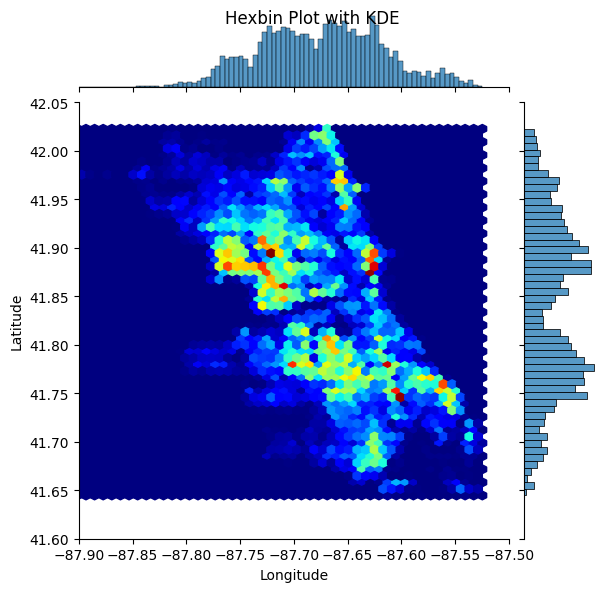

In [30]:
# Example data (replace with your actual data)
crimes_new = df_cleaned[(df_cleaned['Primary Type'] == 'SEX OFFENSE') |
                        (df_cleaned['Primary Type'] == 'HOMICIDE') |
                        (df_cleaned['Primary Type'] == 'ARSON')]

# Hexbin plot with KDE
sns.jointplot(x='Longitude', y='Latitude', data=crimes_new, kind='hex', cmap='jet')

plt.xlim(-87.9, -87.5)
plt.ylim(41.60, 42.05)
plt.suptitle('Hexbin Plot with KDE')
plt.show()


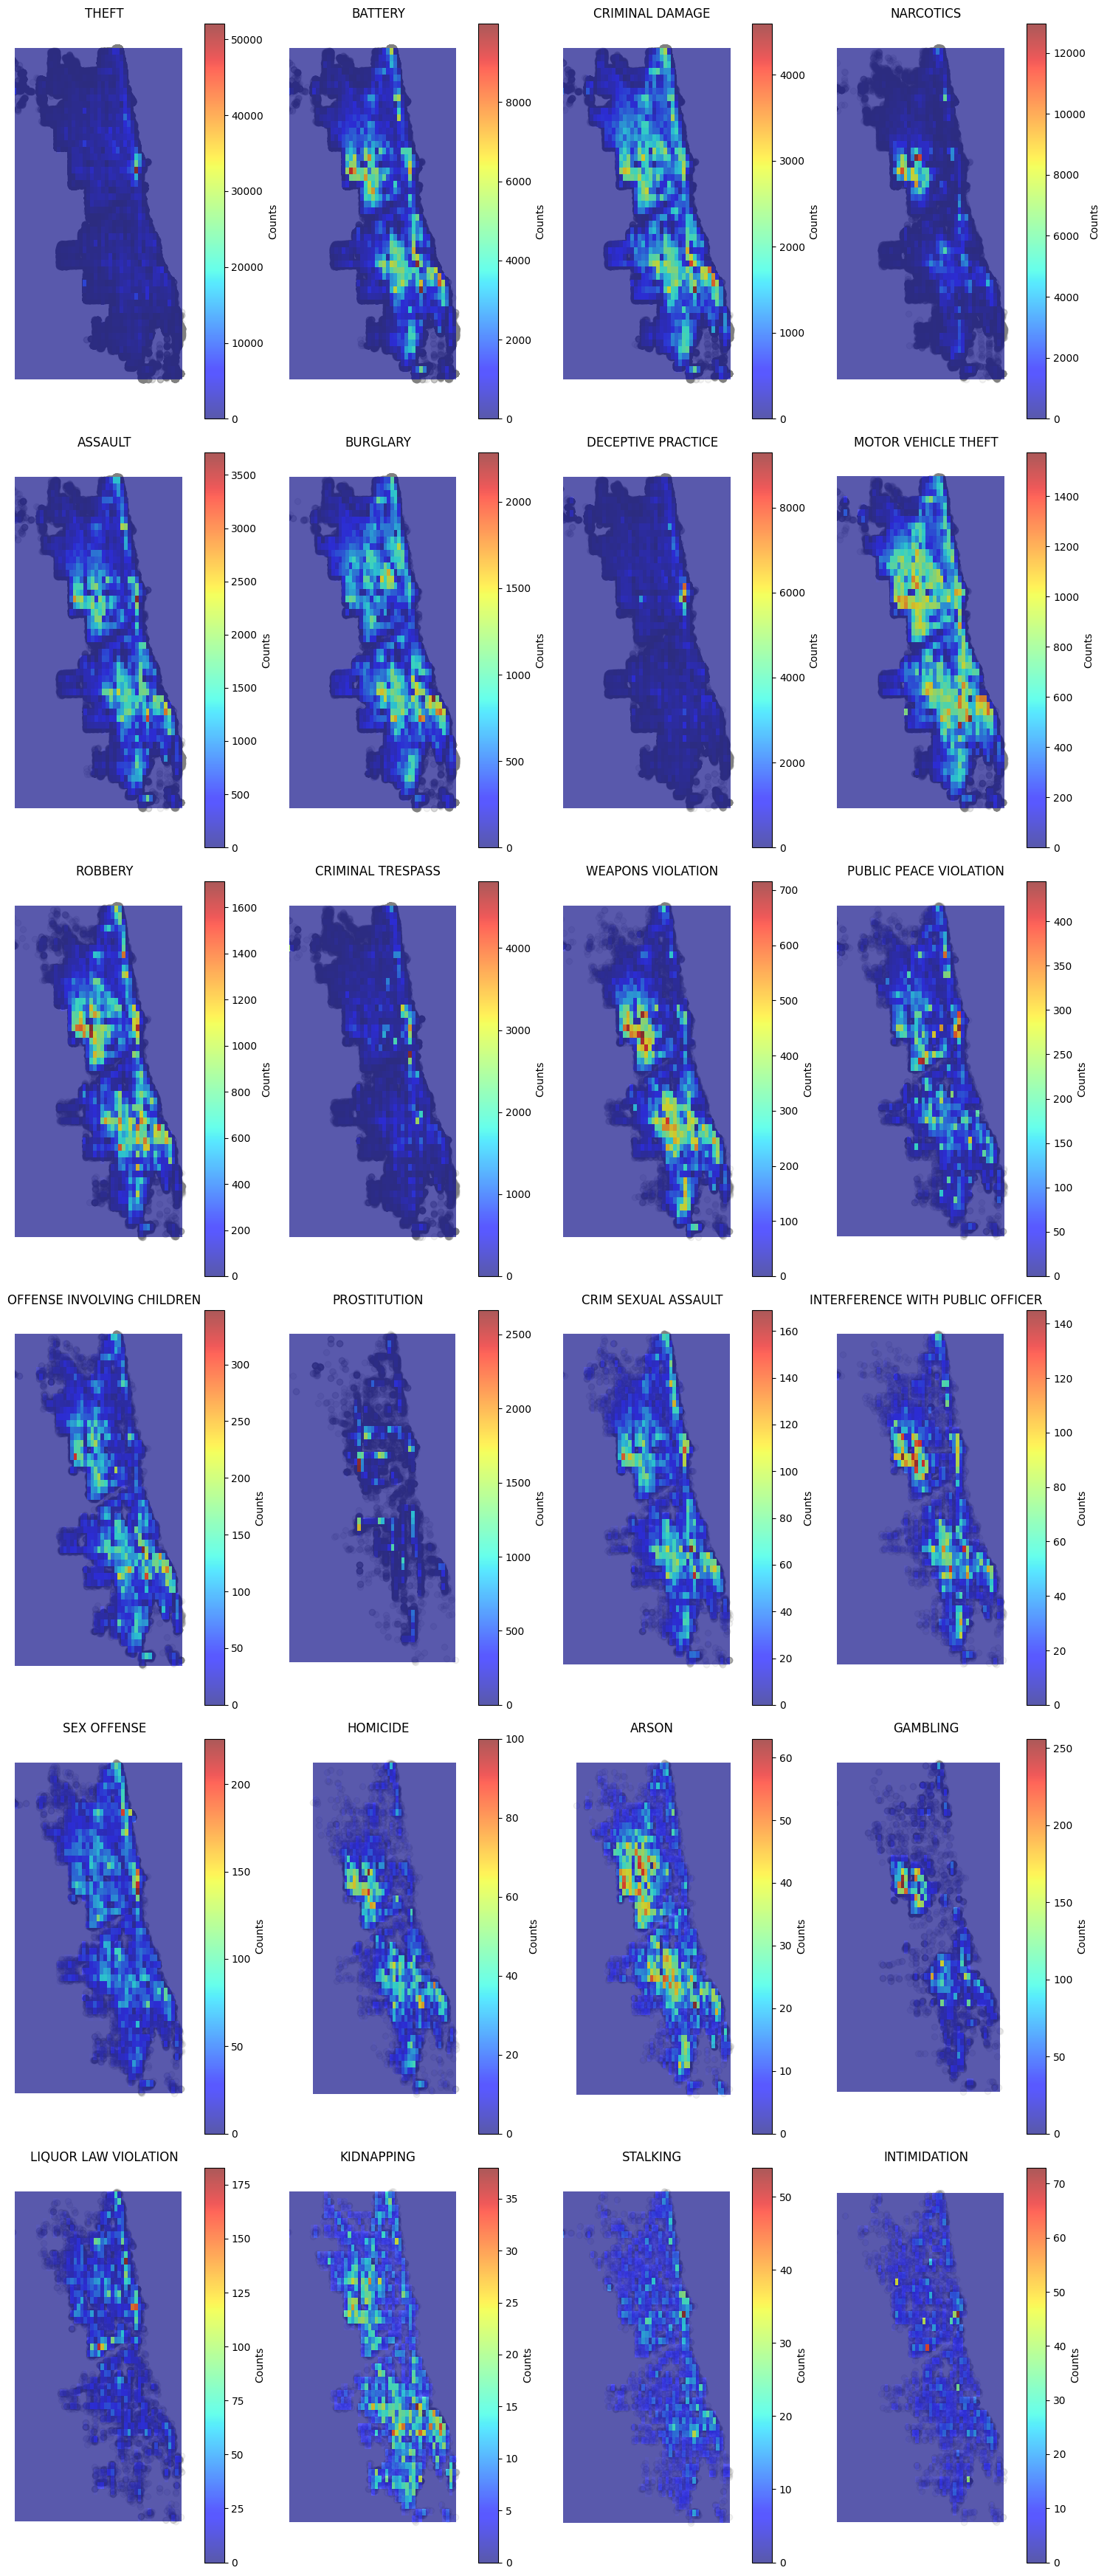

In [31]:
fig = plt.figure(figsize=(15, 35))

# Loop through each crime type
for i, crime_type in enumerate(ctypes):
    ax = fig.add_subplot(int(np.ceil(float(len(ctypes)) / 4)), 4, i + 1) # 4 plots per row
    
    # Filter data for the current crime type
    df_filtered = df_cleaned[df_cleaned['Primary Type'] == crime_type]
    
    # Scatter plot with regplot
    sns.regplot(x='Longitude', y='Latitude',
                data=df_filtered,
                fit_reg=False, marker='o',
                scatter_kws={'alpha':.1, 'color':'grey'},
                ax=ax)
    
    # 2D Histogram plot
    hist = ax.hist2d(df_filtered['Longitude'], df_filtered['Latitude'], bins=50, cmap='jet', alpha=0.65)
    
    # Add color bar
    cb = plt.colorbar(hist[3], ax=ax)
    cb.set_label('Counts')
    
    ax.set_title(crime_type)
    ax.set_xlim(-87.9, -87.5)
    ax.set_ylim(41.60, 42.05)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

In [32]:
df.to_csv('crime_data.csv', index = False)